<a href="https://colab.research.google.com/github/inaianebarros/alura-store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#2. Análise do faturamento


##Faturamento

In [3]:
dict_dataframe = {'Loja 1': loja1, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}

In [4]:
for key in dict_dataframe.keys():
  dict_dataframe[key]['Loja'] = key

In [5]:
df_total = pd.concat(dict_dataframe.values(), ignore_index=True)
df_total

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4


## Faturamento total por Lojas



In [67]:
faturamento_total = (
    df_total.groupby('Loja')[['Preço', 'Frete']].sum().reset_index()
)

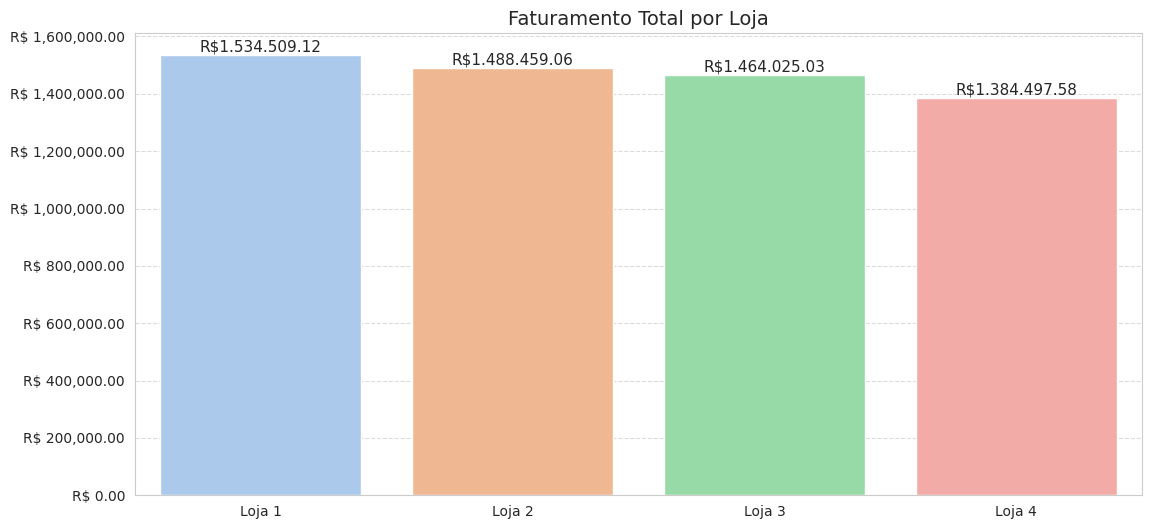

In [68]:
import matplotlib.ticker as ticker
sns.set_style("whitegrid")


# Criando o gráfico de barras

plt.figure(figsize=(13,6))
ax = sns.barplot(x='Loja', y='Preço', data=faturamento_total,  palette='pastel', hue=faturamento_total.index ,legend=False)
ax.set_xlabel('') # Remove label do eixo x

# Formata os números no eixo Y para o padrão brasileiro
ax = plt.gca()  # Obtém os eixos atuais
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

for i, valor in enumerate(faturamento_total['Preço']):
    ax.text(i, valor + 2000, f'R${valor:,.2f}'.replace(',', '.'),
            ha='center', va='bottom', fontsize=11)

# Títulos e labels
plt.title('Faturamento Total por Loja', fontsize=14)
plt.ylabel('', fontsize=12)

# Adiciona uma grade ao gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


 Faturamento total de todas as lojas: R$58.71490,79




## Faturamento Liquido da loja sem o valor do frete


In [8]:
faturamento_total['Preço Líquido'] = (
    faturamento_total['Preço'] - faturamento_total['Frete']
)

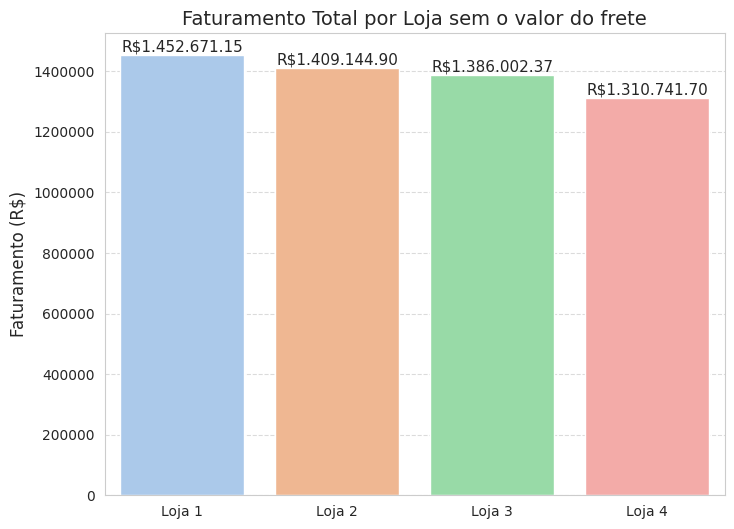

In [9]:
# Criando o gráfico de barras

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Loja', y='Preço Líquido', data=faturamento_total,  palette='pastel', hue=faturamento_total.index ,legend=False)
ax.set_xlabel('')        # Remove label do eixo x
ax.ticklabel_format(style='plain', axis='y') # Desativar notação científica

# Adicionando os valores em cima das barras
for i, valor in enumerate(faturamento_total['Preço Líquido']):
    ax.text(i, valor + 2000, f'R${valor:,.2f}'.replace(',', '.'), ha='center', va='bottom', fontsize=11)

# Títulos e labels
plt.title('Faturamento Total por Loja sem o valor do frete', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=12)


# Adiciona uma grade ao gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Faturamento Semestral de cada Loja

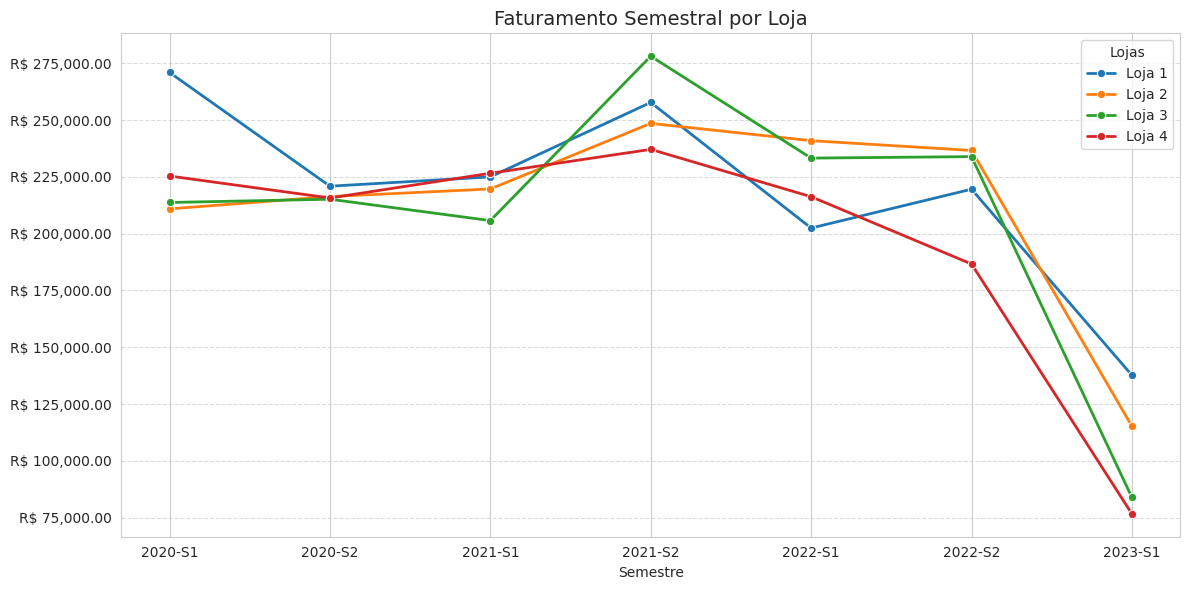

In [22]:
# Garantir que a coluna de data está no formato datetime
df_total['Data da Compra'] = pd.to_datetime(df_total['Data da Compra'])

# Criar coluna "Ano-Semestre" (ex: 2023-1, 2023-2)
df_total['Semestre'] = df_total['Data da Compra'].dt.year.astype(str) + "-S" + \
                       ((df_total['Data da Compra'].dt.month - 1)//6 + 1).astype(str)

# Agrupar por Loja e Semestre
faturamento_semestral = df_total.groupby(['Loja', 'Semestre'])['Preço'].sum().reset_index()

# Ordenar por semestre cronologicamente
faturamento_semestral['Semestre'] = pd.Categorical(
    faturamento_semestral['Semestre'],
    categories=sorted(faturamento_semestral['Semestre'].unique()),
    ordered=True
)

# Gráfico de linhas
plt.figure(figsize=(12,6))
sns.lineplot(
    x='Semestre',
    y='Preço',
    hue='Loja',
    marker='o',
    linewidth=2,
    data=faturamento_semestral,
    palette='tab10'
)

# Ajustes visuais
plt.title('Faturamento Semestral por Loja', fontsize=14)
plt.xlabel('Semestre')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatar valores em reais
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.legend(title="Lojas")
plt.tight_layout()
plt.show()


# 3. Vendas por Categoria


## Participação das Categorias no Faturamento

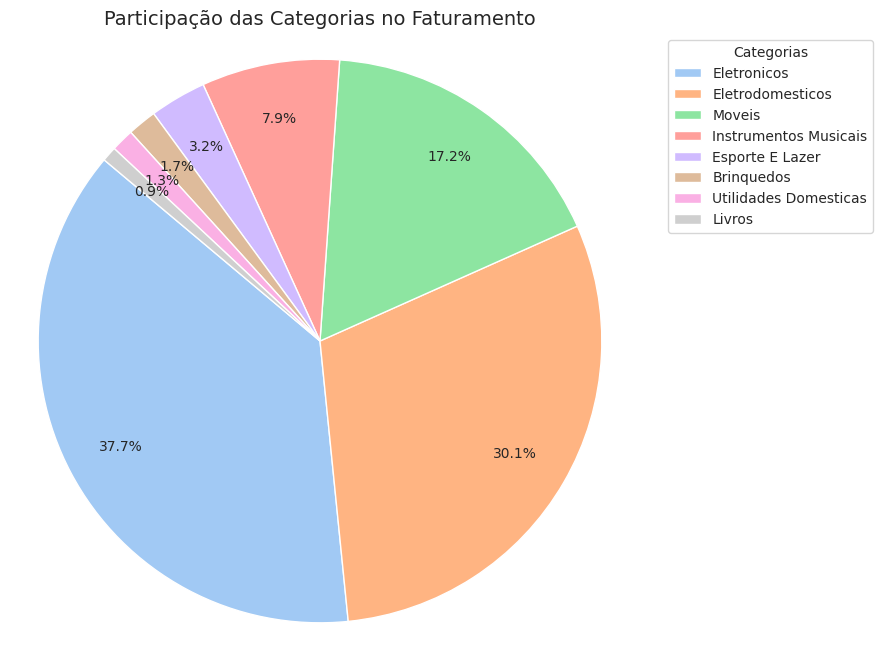

In [10]:
# Agrupar vendas por categoria
categorias_vendas = df_total.groupby('Categoria do Produto')['Preço'].sum().reset_index()

# Ordenar por valor
categorias_vendas = categorias_vendas.sort_values(by='Preço', ascending=False)

# Capitalizar nomes das categorias
categorias_vendas['Categoria do Produto'] = categorias_vendas['Categoria do Produto'].str.title()

# Gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(categorias_vendas['Preço'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'),pctdistance=0.8, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Legenda ao lado
plt.legend(
    categorias_vendas['Categoria do Produto'],
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title="Categorias"
)

plt.title('Participação das Categorias no Faturamento', fontsize=14)
plt.axis('equal')  # Garante formato circular
plt.show()


## Faturamento por loja (Principais Categorias)

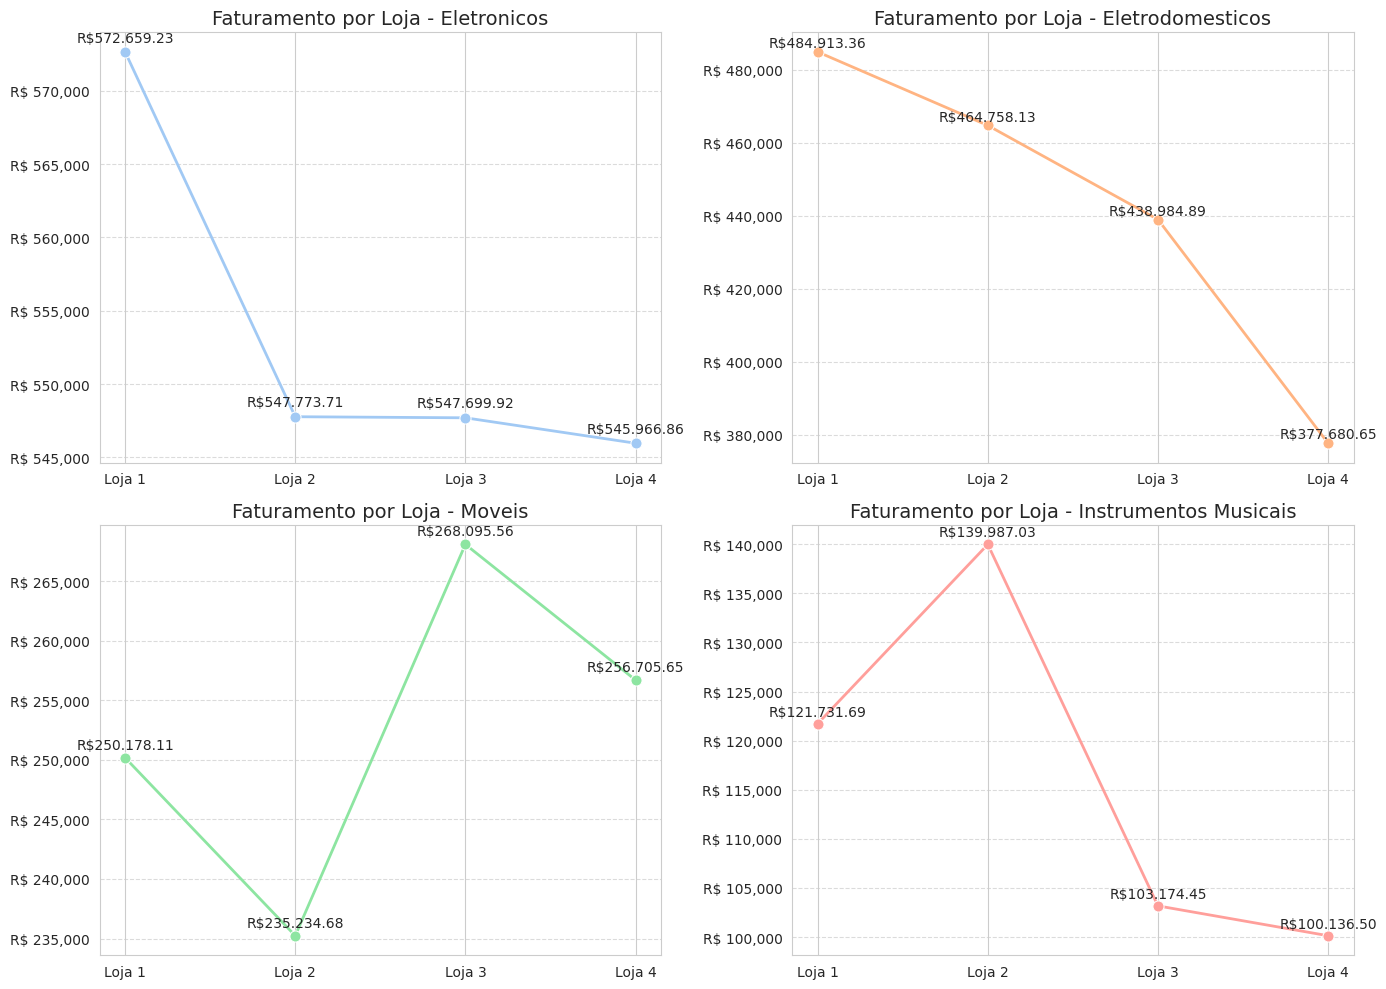

In [71]:
# Filtrar apenas as categorias principais
categorias_principais = ['eletronicos', 'eletrodomesticos', 'moveis', 'instrumentos musicais']
df_principais = df_total[df_total['Categoria do Produto'].isin(categorias_principais)]

# Agrupar por categoria e loja
vendas_por_loja = df_principais.groupby(['Categoria do Produto', 'Loja'])['Preço'].sum().reset_index()

# Paleta de cores pastel para cada categoria
cores = sns.color_palette("pastel", len(categorias_principais))
cor_dict = dict(zip(categorias_principais, cores))

# Criar subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, categoria in enumerate(categorias_principais):
    ax = axes[i]
    dados_categoria = vendas_por_loja[vendas_por_loja['Categoria do Produto'] == categoria]

    # Gráfico de linhas: cada ponto é o faturamento da loja
    sns.lineplot(
        x='Loja',
        y='Preço',
        data=dados_categoria,
        marker='o',
        linewidth=2,
        markersize=8,
        ax=ax,
        color= cor_dict[categoria]
    )

    # Adicionar anotações com valores exatos
    for idx, row in dados_categoria.iterrows():
        ax.text(
            x=row['Loja'],
            y=row['Preço'] + 500,  # ligeiramente acima do ponto
            s=f"R${row['Preço']:,.2f}".replace(',', '.'),
            ha='center',
            va='bottom',
            fontsize=10
        )

    ax.set_title(f'Faturamento por Loja - {categoria.title()}', fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


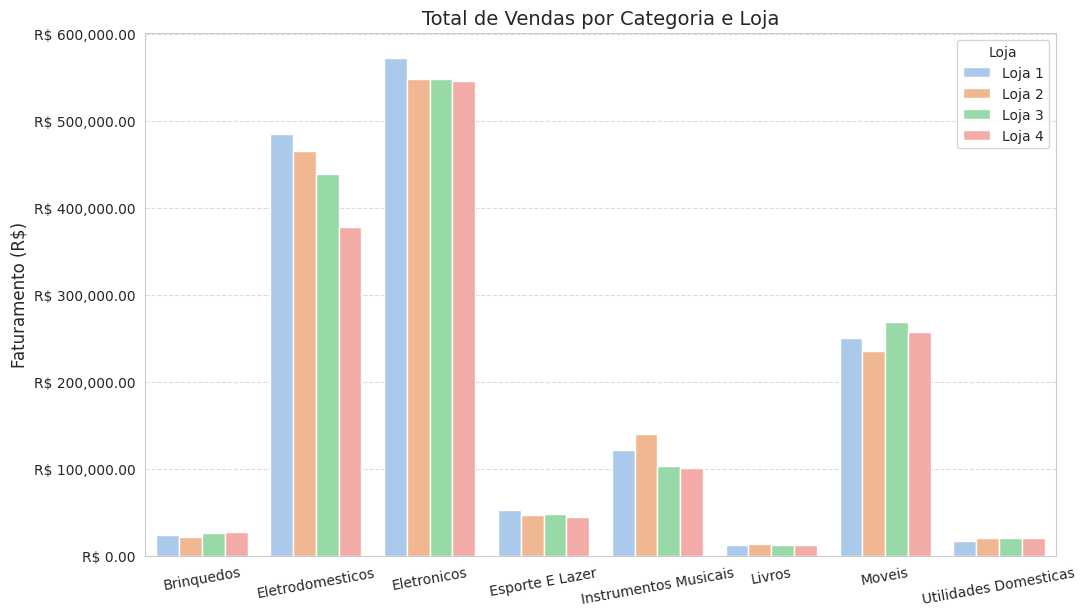

In [12]:
# Agrupar vendas por Loja e Categoria
vendas_categoria_loja = df_total.groupby(['Loja', 'Categoria do Produto'])['Preço'].sum().reset_index()

# Capitalizar nomes das categorias
vendas_categoria_loja['Categoria do Produto'] = vendas_categoria_loja['Categoria do Produto'].str.title()

# Criar gráfico de barras agrupadas
plt.figure(figsize=(11,6))
sns.barplot(
    x='Categoria do Produto',
    y='Preço',
    hue='Loja',
    data=vendas_categoria_loja,
    palette='pastel'
)

# Títulos e rótulos
plt.title('Total de Vendas por Categoria e Loja', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xlabel('')

# Formatar eixo Y como moeda brasileira
import matplotlib.ticker as ticker
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loja')
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()


# 3. Média de Avaliação das Lojas

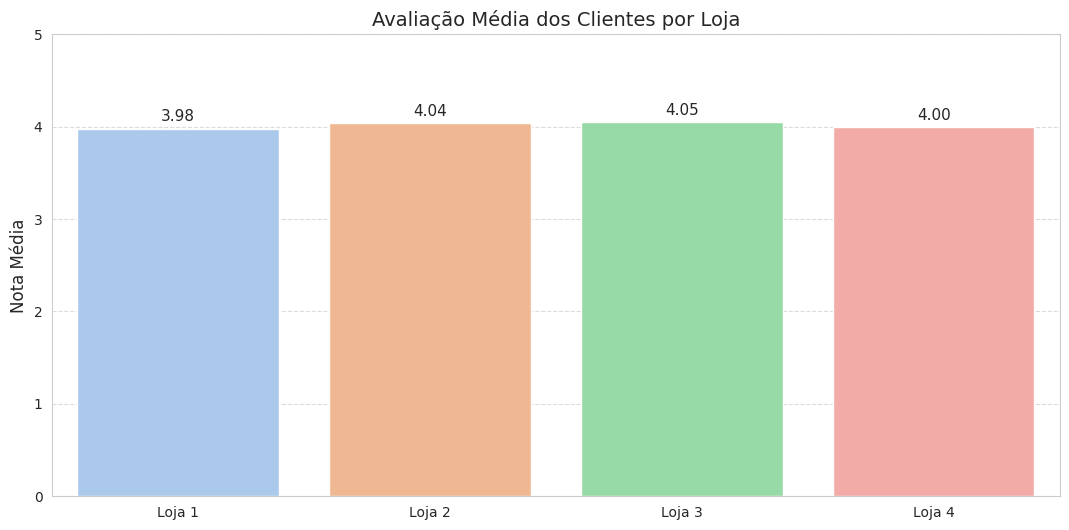

In [38]:
# Agrupar por loja e calcular avaliação média
avaliacao_media = df_total.groupby('Loja')['Avaliação da compra'].mean().reset_index()

# Criar gráfico de barras
plt.figure(figsize=(13,6))
ax = sns.barplot(
    x='Loja',
    y='Avaliação da compra',
    data=avaliacao_media,
    palette='pastel',
    hue=avaliacao_media.index,
    legend=False
)

# Ajustes visuais
ax.set_title('Avaliação Média dos Clientes por Loja', fontsize=14)
ax.set_ylabel('Nota Média', fontsize=12)
ax.set_xlabel('')
ax.set_ylim(0, 5)  # notas de 0 a 5
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores sobre as barras
for i, valor in enumerate(avaliacao_media['Avaliação da compra']):
    ax.text(i, valor + 0.05, f'{valor:.2f}', ha='center', va='bottom', fontsize=11)

plt.show()


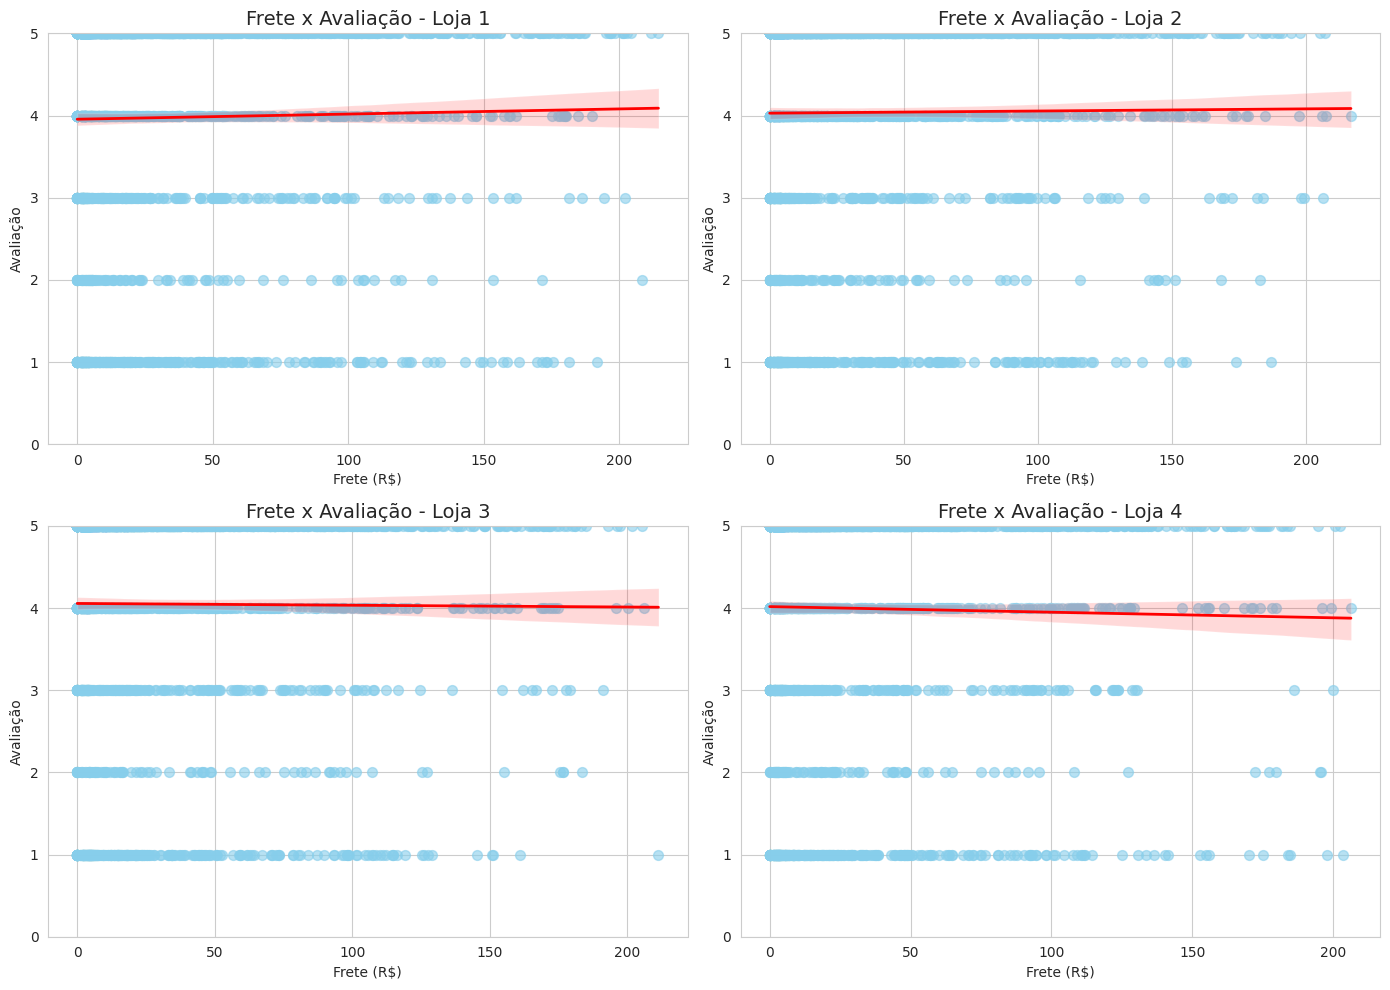

In [72]:
# Lista das lojas
lojas = df_total['Loja'].unique()

# Criar subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, loja in enumerate(lojas):
    ax = axes[i]
    dados_loja = df_total[df_total['Loja'] == loja]

    # Gráfico de dispersão com linha de tendência
    sns.regplot(
        x='Frete',
        y='Avaliação da compra',
        data=dados_loja,
        ax=ax,
        scatter_kws={'s':50, 'alpha':0.6, 'color':'skyblue'},
        line_kws={'color':'red', 'lw':2}
    )

    ax.set_title(f'Frete x Avaliação - {loja}', fontsize=14)
    ax.set_xlabel('Frete (R$)')
    ax.set_ylabel('Avaliação')
    ax.set_ylim(0,5)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

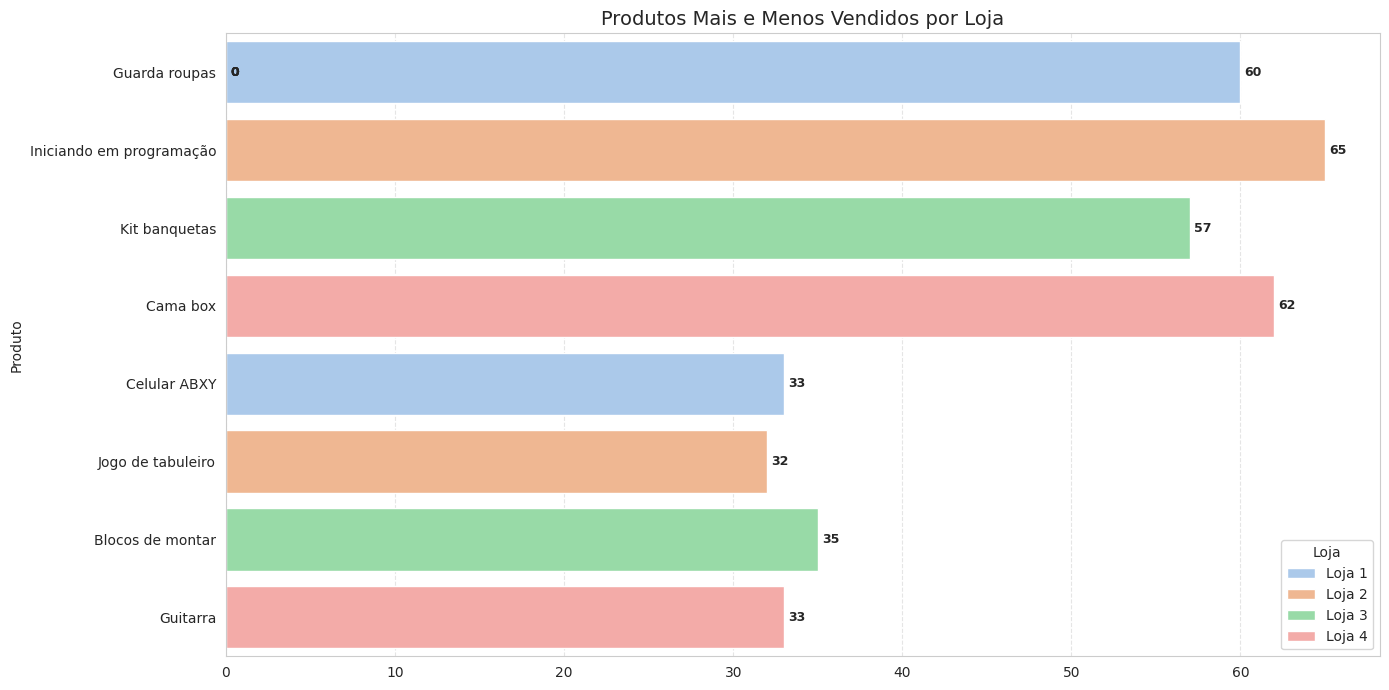

In [80]:
# Agrupamento
produto_stats = df_total.groupby(['Produto', 'Loja']).agg(
    Quantidade=('Produto', 'count'),
    Valor_Total=('Preço', 'sum')
).reset_index()

# Mais vendidos por loja
mais_vendidos = produto_stats.loc[produto_stats.groupby('Loja')['Quantidade'].idxmax()]
mais_vendidos['Tipo'] = 'Mais Vendido'

# Menos vendidos por loja
menos_vendidos = produto_stats.loc[produto_stats.groupby('Loja')['Quantidade'].idxmin()]
menos_vendidos['Tipo'] = 'Menos Vendido'

# Concatenar para o gráfico
dados_plot = pd.concat([mais_vendidos, menos_vendidos])

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=dados_plot,
    y='Produto',
    x='Quantidade',
    hue='Loja',
    palette= 'pastel',
)

# Títulos e labels
plt.title('Produtos Mais e Menos Vendidos por Loja', fontsize=14)
plt.xlabel('')
plt.ylabel('Produto')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adicionar rótulos nas barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (p.get_x() + width, p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        xytext=(3, 0),
        textcoords='offset points',
        fontsize=9, weight='bold'
    )

# Ajustar legenda
plt.legend(title='Loja', loc='lower right')

plt.tight_layout()
plt.show()


In [77]:
dados_plot

,Produto,Loja,Quantidade,Valor_Total,Tipo
96,Guarda roupas,Loja 1,60,39282.78,Mais Vendido
113,Iniciando em programação,Loja 2,65,4169.96,Mais Vendido
130,Kit banquetas,Loja 3,57,22265.96,Mais Vendido
35,Cama box,Loja 4,62,43928.57,Mais Vendido
44,Celular ABXY,Loja 1,33,43534.47,Menos Vendido
125,Jogo de tabuleiro,Loja 2,32,7749.58,Menos Vendido
14,Blocos de montar,Loja 3,35,1649.81,Menos Vendido
103,Guitarra,Loja 4,33,34430.67,Menos Vendido


# 5. Frete Médio por Loja


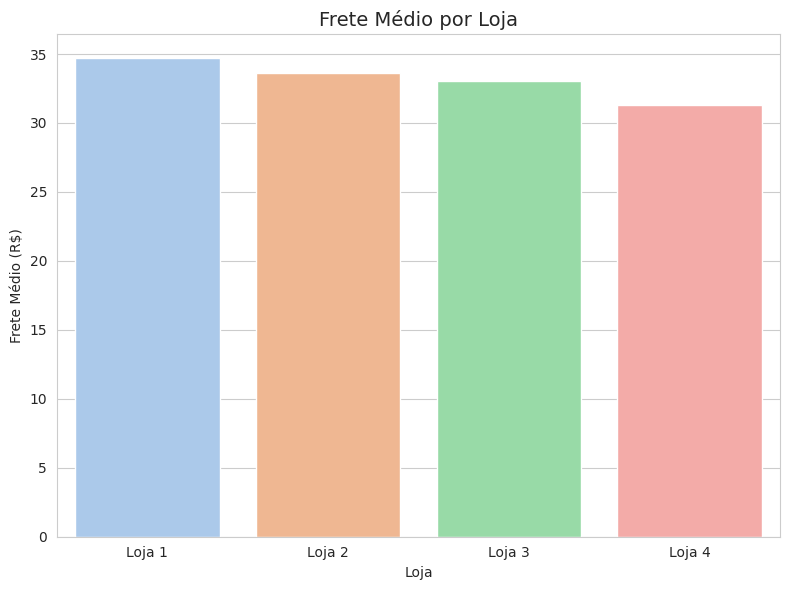

In [91]:
# Exemplo: calcular o frete médio por loja
frete_medio = df_total.groupby("Loja")["Frete"].mean().reset_index()

# Gráfico de barras para comparar o frete médio
plt.figure(figsize=(8,6))
sns.barplot(x="Loja", y="Frete", data=frete_medio, palette='pastel', hue=frete_medio.index, legend=False)

plt.title("Frete Médio por Loja", fontsize=14)
plt.xlabel('Loja')
plt.ylabel("Frete Médio (R$)")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


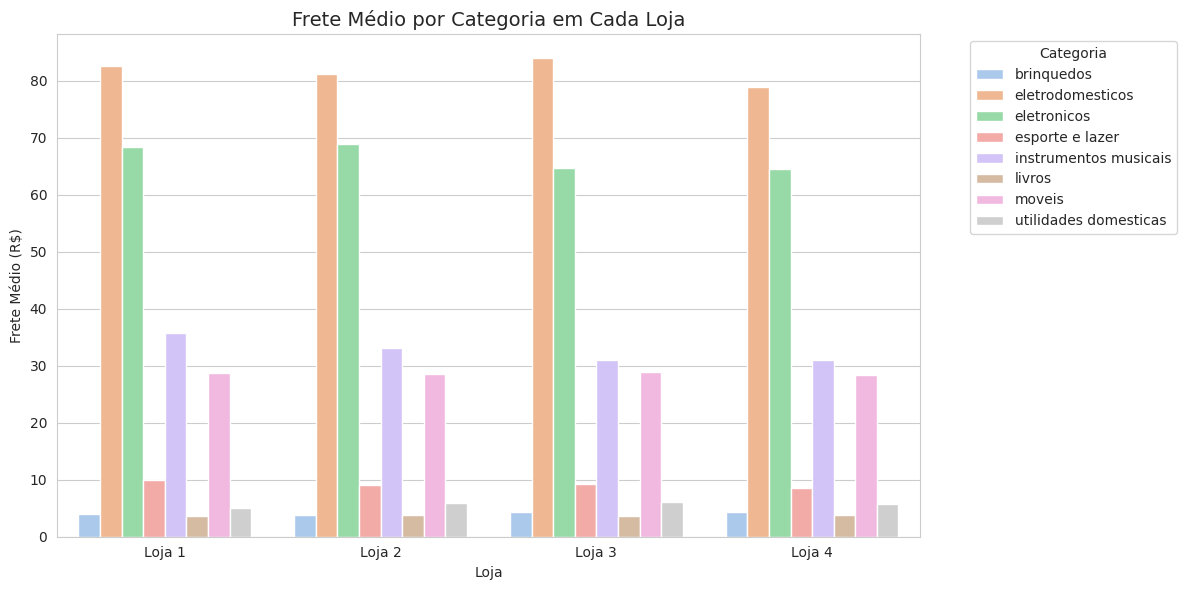

In [105]:
# Calcular o frete médio por loja e categoria
frete_medio = df_total.groupby(["Loja", "Categoria do Produto"])["Frete"].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(
    x="Loja",
    y="Frete",
    hue="Categoria do Produto",
    data=frete_medio,
    palette="pastel"
)

plt.title("Frete Médio por Categoria em Cada Loja", fontsize=14)
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
